In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load(path):
    img=cv2.imread(path)
    img=cv2.resize(img, (400,400))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=cv2.GaussianBlur(img,(3,3),0)
    return img

def show(img, cmap=None):
    plt.figure(figsize=(10,6))
    plt.imshow(img,cmap=cmap)

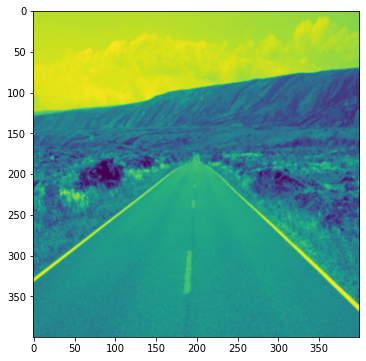

In [209]:
img=load('Downloads/rd1.jpg')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img_gray)

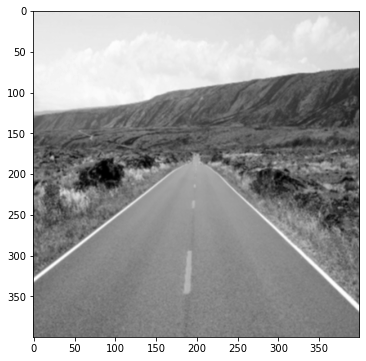

In [216]:
gray=cv2.addWeighted(img_gray,1.2,img_gray,0,10)
show(img_gray, cmap='gray')

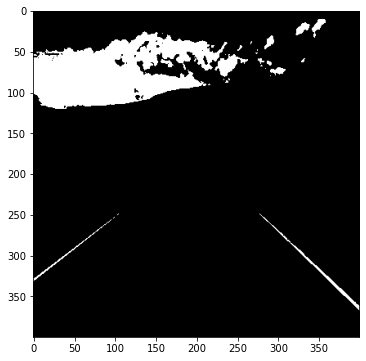

In [218]:
img2_gray=cv2.threshold(img_gray,235,255,cv2.THRESH_BINARY)[1]
show(img2_gray, cmap='gray')

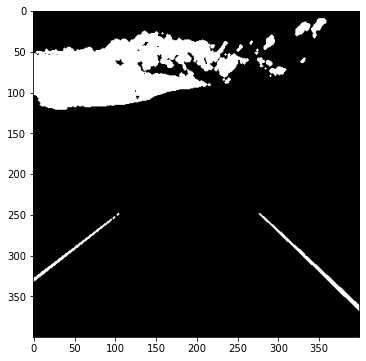

In [219]:
new=cv2.dilate(img2_gray,kernel,iterations = 1)
show(new, 'gray')

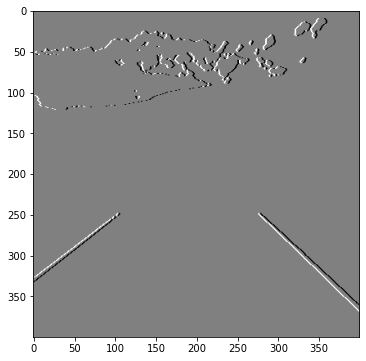

In [221]:
kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
#ex=cv2.morphologyEx(img2_gray, cv2.MORPH_OPEN, kernel)
ex2=cv2.Sobel(new,cv2.CV_64F,1,0,ksize=1)
show(ex2, cmap='gray')

In [222]:
ex2.dtype, img2_gray.dtype

(dtype('float64'), dtype('uint8'))

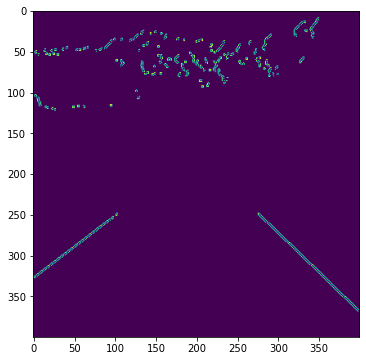

In [223]:
#show(cv2.Canny(img2_gray, 100,200))
ex4=cv2.Canny(ex2.astype('uint8'), 50,100)
show(ex4)

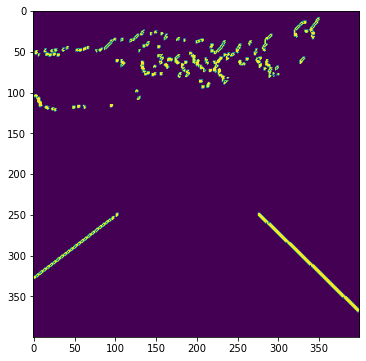

In [225]:
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
show(cv2.dilate(ex4,kernel,iterations = 1))

# Main function for processing

In [201]:
def process(org_img,img):
#takes gray scale images
    # Increase contrast of gray scale img................. 
    img=cv2.addWeighted(img,1.2,img,0,10)
    #Threshloding
    
    img=cv2.threshold(img,250,255,cv2.THRESH_BINARY)[1]
    #Image Gradients(dx) with sobel
    img=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=1)
    img=img.astype('uint8')
    
    #Canny edge
    img=cv2.Canny(img.astype('uint8'), 50,100)
    show(img, 'gray')
    
    #dilate
    kernel=cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    img=cv2.dilate(img,kernel,iterations = 1)
    print(img.shape)
    show(img, 'gray')
    
    #contour masking
    co, hi = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ = sorted(co,key=cv2.contourArea,reverse=True)
    biggest = sorted_[0:2]
    
    show(cv2.fillPoly(org_img, pts=biggest, color=(0,255,255)))
    

(400, 400)


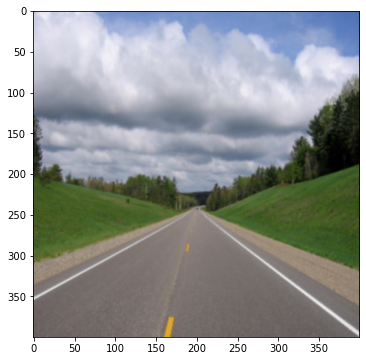

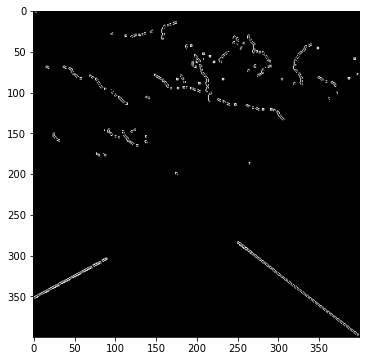

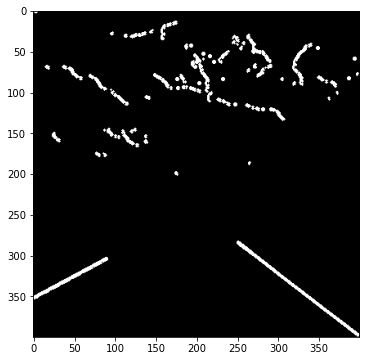

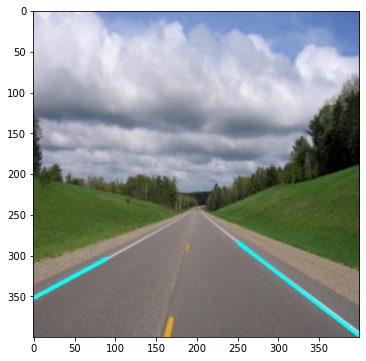

In [202]:
img=load('Downloads/rd2.jpg')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img)
process(img,img_gray)

(400, 400)


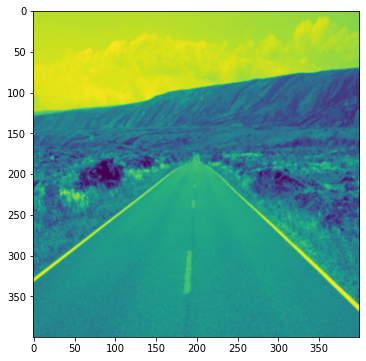

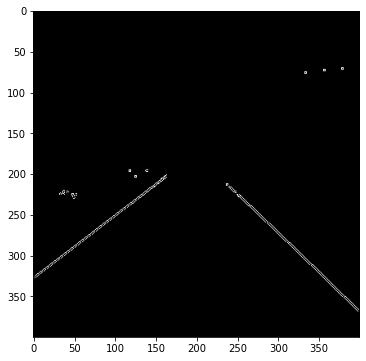

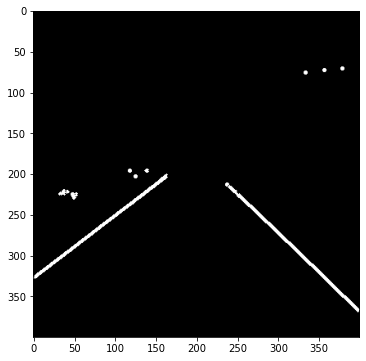

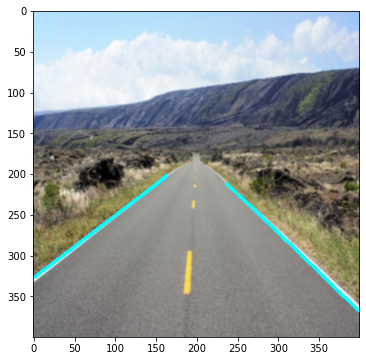

In [203]:
img=load('Downloads/rd1.jpg')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img_gray)
result=process(img,img_gray)

(400, 400)


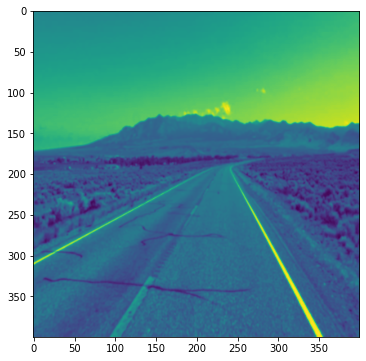

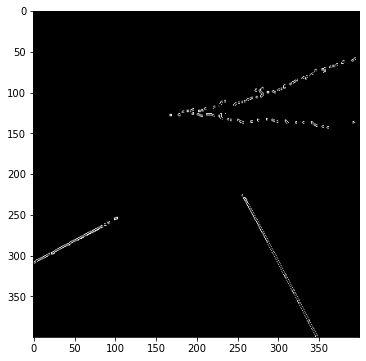

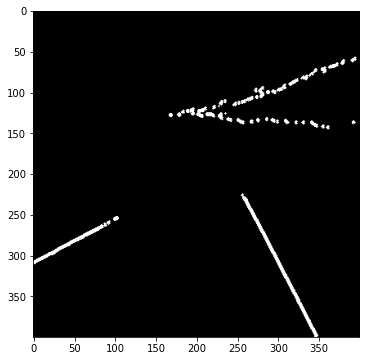

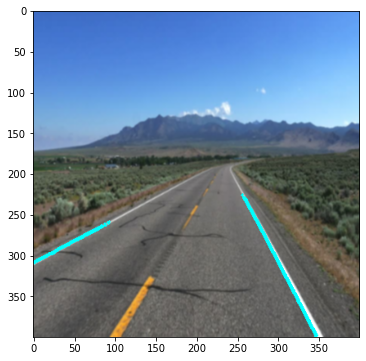

In [204]:
img=load('Downloads/rd3.jpg')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img_gray)
gray_f=process(img,img_gray)